In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from datetime import datetime

In [10]:
df = pd.read_csv("D:/downloads 2/sales_data.csv")

# View basic info

In [11]:
print(df.head())

         Date     Product  Quantity  Revenue
0  2025-05-12  Smartphone         3    75000
1  2025-05-12  Headphones         2    10000
2  2025-05-12      Tablet         2    40000
3  2025-05-12  Headphones         4    20000
4  2025-05-13  Headphones         2    10000


In [12]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      79 non-null     object
 1   Product   79 non-null     object
 2   Quantity  79 non-null     int64 
 3   Revenue   79 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 2.6+ KB
None


# Preprocess

In [14]:
df['Date'] = pd.to_datetime(df['Date'])
df['Revenue'] = pd.to_numeric(df['Revenue'], errors='coerce')
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')


# Drop null values

In [16]:
df.dropna(subset=['Date', 'Quantity', 'Revenue'], inplace=True)

# Create time-based feature (days since start)

In [17]:
df['days'] = (df['Date'] - df['Date'].min()).dt.days

# Group data by date (sum revenue)

In [19]:
daily_sales = df.groupby('days').agg({'Revenue': 'sum'}).reset_index()

# Define features and labels

In [20]:
X = daily_sales[['days']]
y = daily_sales['Revenue']

# Train-test split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Linear Regression

In [22]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Predict

In [23]:
y_pred = model.predict(X_test)

# Evaluate

In [24]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 12643030503.721512


# Plot actual vs predicted

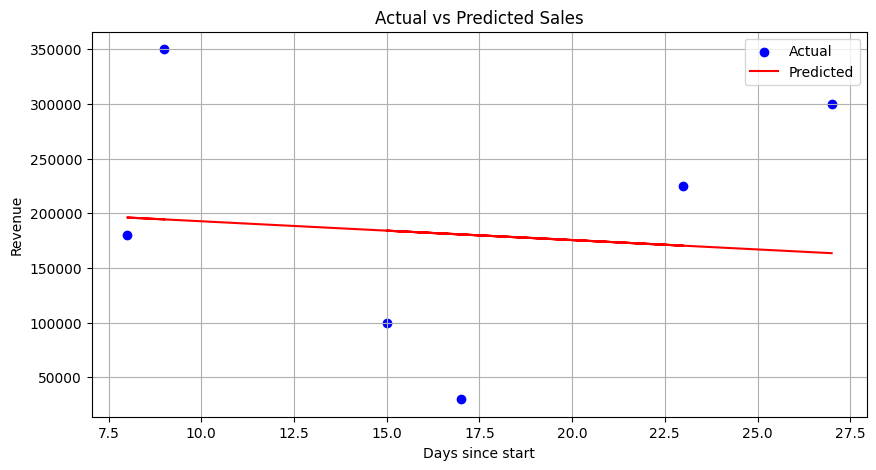

In [25]:
plt.figure(figsize=(10, 5))
plt.scatter(X_test, y_test, label='Actual', color='blue')
plt.plot(X_test, y_pred, label='Predicted', color='red')
plt.xlabel("Days since start")
plt.ylabel("Revenue")
plt.title("Actual vs Predicted Sales")
plt.legend()
plt.grid(True)
plt.show()

# Future forecast (next 30 days)

In [26]:
future_days = pd.DataFrame({'days': range(df['days'].max()+1, df['days'].max()+31)})
future_predictions = model.predict(future_days)

# Tabular forecast

In [27]:
forecast_df = pd.DataFrame({
    'Future Day': future_days['days'],
    'Predicted Revenue': future_predictions
})
print(forecast_df)

    Future Day  Predicted Revenue
0           30      158366.942434
1           31      156650.293002
2           32      154933.643571
3           33      153216.994140
4           34      151500.344709
5           35      149783.695277
6           36      148067.045846
7           37      146350.396415
8           38      144633.746984
9           39      142917.097553
10          40      141200.448121
11          41      139483.798690
12          42      137767.149259
13          43      136050.499828
14          44      134333.850396
15          45      132617.200965
16          46      130900.551534
17          47      129183.902103
18          48      127467.252671
19          49      125750.603240
20          50      124033.953809
21          51      122317.304378
22          52      120600.654947
23          53      118884.005515
24          54      117167.356084
25          55      115450.706653
26          56      113734.057222
27          57      112017.407790
28          58

 # Total Revenue Over Time (Line Chart)

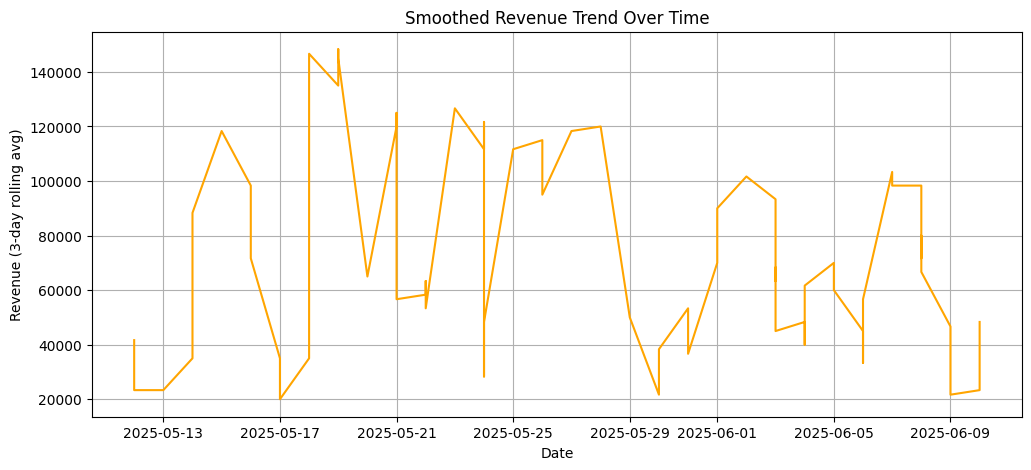

In [29]:
plt.figure(figsize=(12, 5))
df_sorted = df.sort_values("Date")
plt.plot(df_sorted['Date'], df_sorted['Revenue'].rolling(window=3).mean(), color='orange')
plt.title("Smoothed Revenue Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Revenue (3-day rolling avg)")
plt.grid(True)
plt.show()


In [ ]:
# Quantity vs Revenue (Correlation Scatter Plot)